In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import os

data_path = os.path.join('..', 'data', 'merged_data.csv')
merged_df = pd.read_csv(data_path)


# Use only the selected features
features = ["pts_reg", "asts_reg", "reb_reg", "stl_reg", "blk_reg", "fga_reg", "fta_reg", "tpa_reg"]
X = merged_df[features]
y = merged_df['is_all_star']

In [2]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit untuned Random Forest model
rf_untuned = RandomForestClassifier(random_state=42)
rf_untuned.fit(X_train, y_train)

# Predict with untuned model
y_pred_untuned = rf_untuned.predict(X_test)
report_untuned = classification_report(y_test, y_pred_untuned, output_dict=True)

In [3]:
# Load tuned model (already trained)
best_model_final = RandomForestClassifier(
    max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300, random_state=42)
best_model_final.fit(X_train, y_train)

# Predict with tuned model
y_pred_tuned = best_model_final.predict(X_test)
report_tuned = classification_report(y_test, y_pred_tuned, output_dict=True)

In [4]:
# Compare performance side-by-side
metrics = ['precision', 'recall', 'f1-score', 'accuracy']
untuned_scores = [
    report_untuned['0']['precision'],
    report_untuned['0']['recall'],
    report_untuned['0']['f1-score'],
    rf_untuned.score(X_test, y_test)
]
tuned_scores = [
    report_tuned['0']['precision'],
    report_tuned['0']['recall'],
    report_tuned['0']['f1-score'],
    best_model_final.score(X_test, y_test)
]


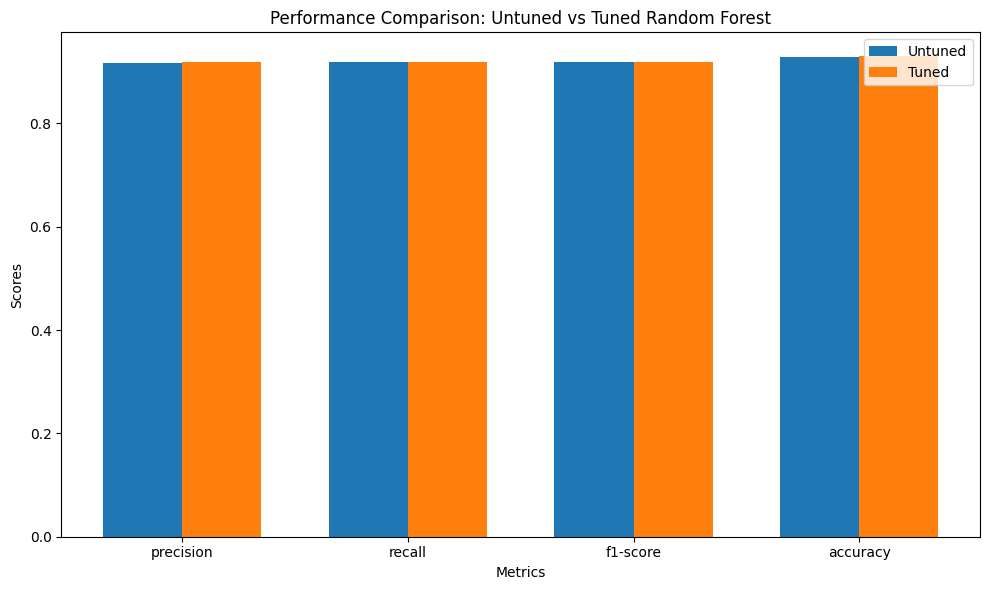

In [7]:
# Plot comparison
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, untuned_scores, width, label='Untuned')
rects2 = ax.bar(x + width/2, tuned_scores, width, label='Tuned')



ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison: Untuned vs Tuned Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
#plt.savefig('../figures/tuned_feature_importance.png')
plt.tight_layout()
plt.show()



C:\Users\kylef\AppData\Local\Temp\ipykernel_31288\1764139406.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


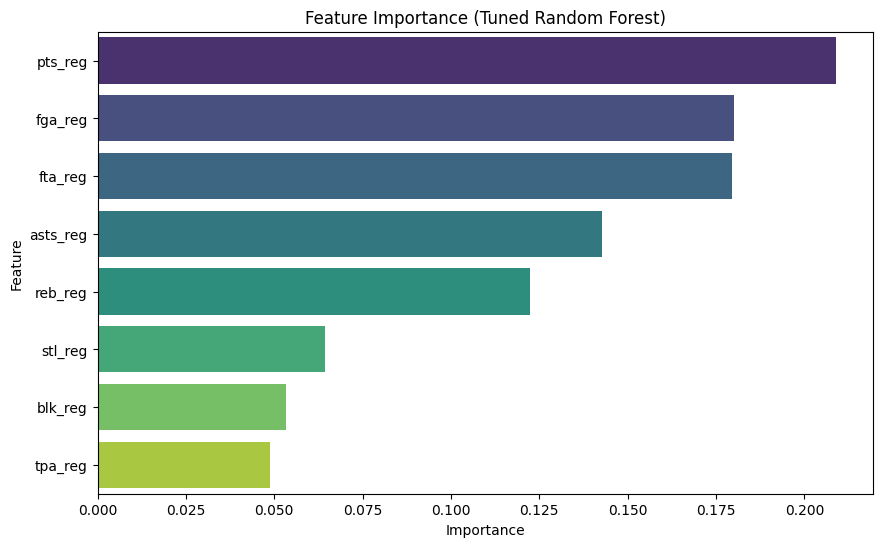

In [8]:
# Plot feature importance for tuned model
importances = best_model_final.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

figures_path = os.path.join('..', 'figures')
os.makedirs(figures_path, exist_ok=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance (Tuned Random Forest)')
plt.savefig(os.path.join(figures_path, "tuned_feature_importance_chart.png"))
plt.show()



In [9]:
# Create the directory if it does not exist
models_path = os.path.join('..', 'models')
os.makedirs(models_path, exist_ok=True)

# Save the tuned model
joblib.dump(best_model_final, os.path.join(models_path, 'tuned_random_forest.pkl'))


['..\\models\\tuned_random_forest.pkl']